In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
from PIL import Image

from network import Style_Transfer_Network
from utils import imload, imshow, maskload

In [2]:
check_point = torch.load("check_point.pth")

#### training loss

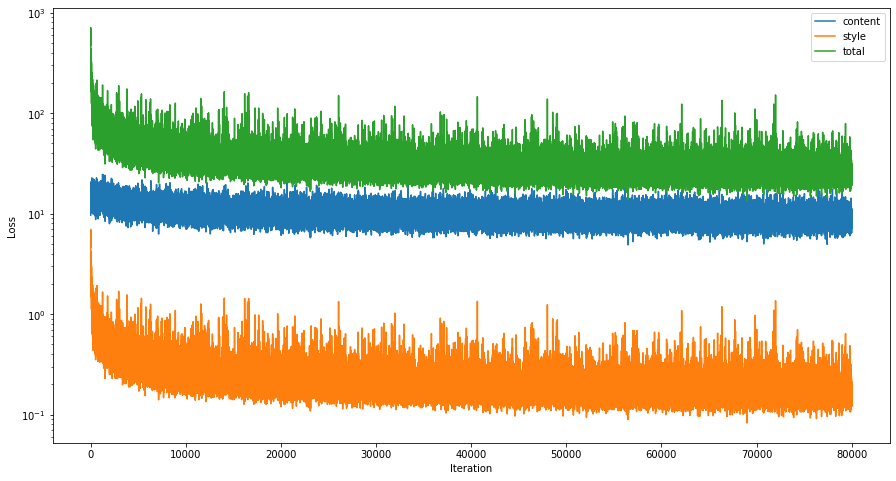

In [3]:
loss_seq = check_point['loss_seq']
plt.figure(figsize=(15,8))
for key, value in loss_seq.items():
    plt.semilogy(value, label=key)
plt.legend(loc='best')
plt.xlabel('Iteration'); plt.ylabel("Loss")
plt.show()

#### Load model

In [4]:
device = torch.device('cuda')

In [5]:
transfer_network = Style_Transfer_Network()
transfer_network.load_state_dict(check_point['state_dict'])

<All keys matched successfully>

#### test stylization

In [6]:
content = 'imgs/content/blonde_girl.jpg'
styles = ['imgs/style/mondrian.jpg']
style_strength = 1.0
interpolation_weights=[1.0]

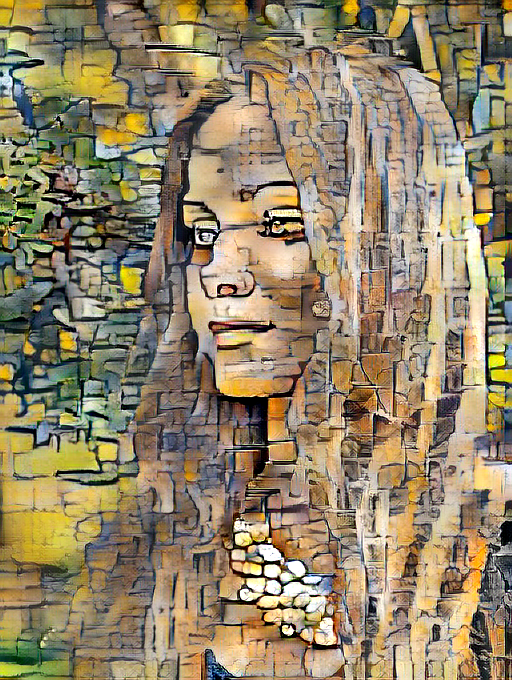

In [7]:
content_img = imload(content, imsize=512)
style_imgs = [imload(style, imsize=512, cropsize=512, cencrop=True) for style in styles]

with torch.no_grad():
    stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights)
imshow(stylized_img)

#### multiple style interpolation

In [8]:
content = 'imgs/content/chicago.jpg'
styles = ['imgs/style/abstraction.jpg', 'imgs/style/starry_night.jpg']
style_strength = 1.0

In [9]:
content_img = imload(content, imsize=512)
style_imgs = [imload(style, imsize=512, cropsize=512, cencrop=True) for style in styles]

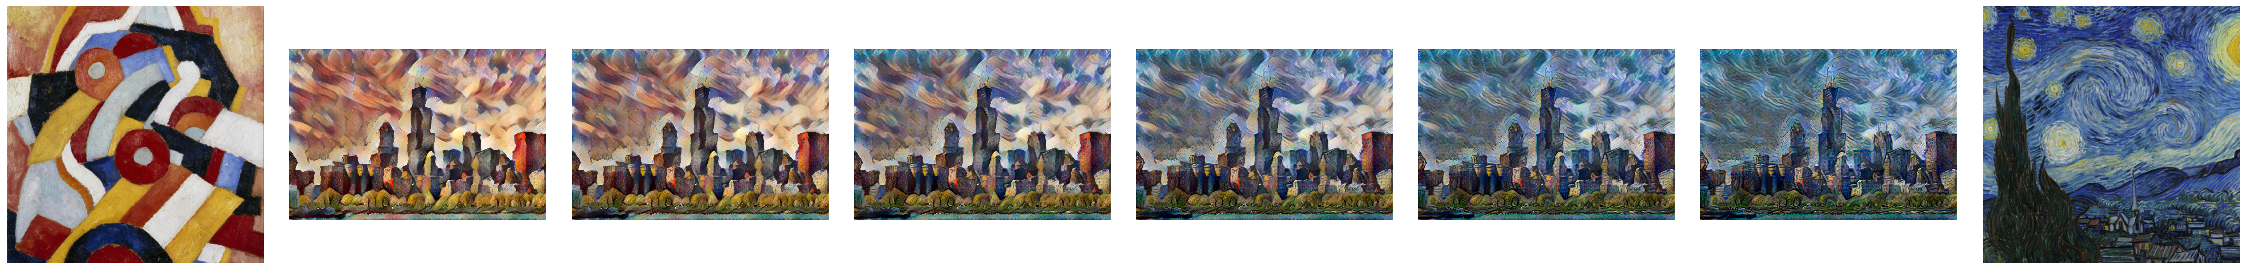

In [10]:
plt.figure(figsize=(40, 10))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1, 8, 1)
plt.imshow(imshow(style_imgs[0])); plt.axis('off')
plt.subplot(1, 8, 8)
plt.imshow(imshow(style_imgs[1])); plt.axis('off')

for i, a in enumerate(range(0,11,2)):        
    with torch.no_grad():
        stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights=[1-a/10, a/10])
    plt.subplot(1, 8, i+2)
    img = imshow(stylized_img)
    plt.imshow(img); plt.axis('off')
plt.show()        

#### Masked multiple stylization

In [11]:
content = 'imgs/content/blonde_girl.jpg'
styles = ['imgs/style/mondrian.jpg', 'imgs/style/starry_night.jpg']
masks = ['imgs/mask/blonde_girl_mask1.jpg', 'imgs/mask/blonde_girl_mask2.jpg']
style_strength = 1.0
interpolation_weights=[1.0, 1.0]

In [12]:
content_img = imload(content, imsize=512)
style_imgs = [imload(style, imsize=512, cropsize=512, cencrop=True) for style in styles]
mask_imgs = [maskload(mask) for mask in masks]

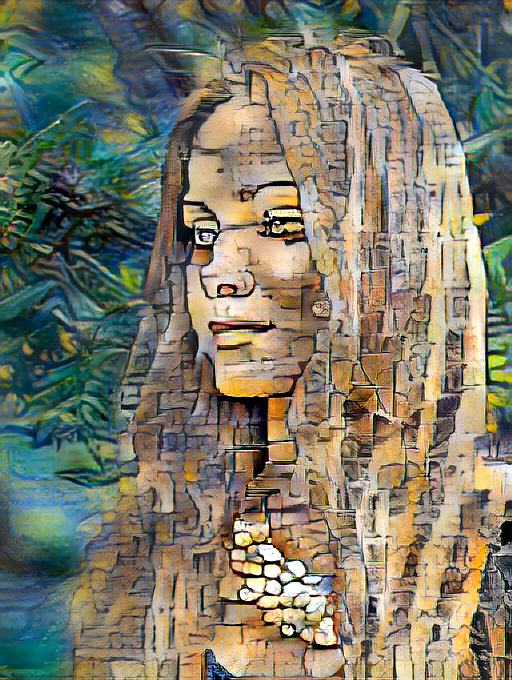

In [13]:
with torch.no_grad():
    stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights, mask_imgs)
imshow(stylized_img)

#### Color preserved stylization

In [14]:
content = 'imgs/content/blonde_girl.jpg'
styles = ['imgs/style/mondrian.jpg']
style_strength = 1.0
interpolation_weights=[1.0]

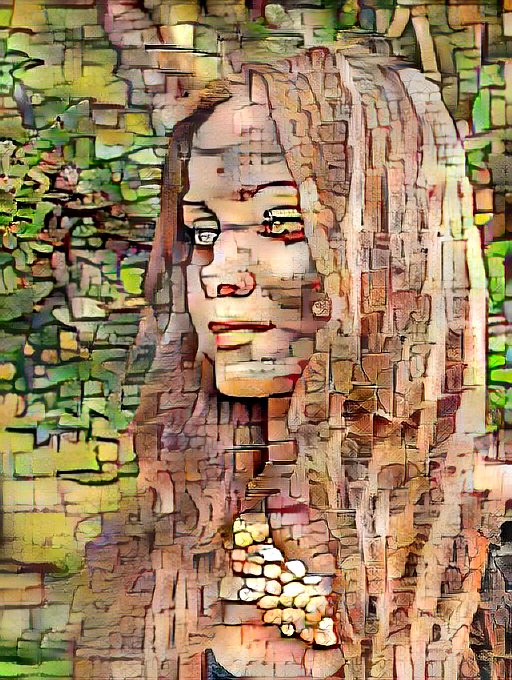

In [15]:
content_img = imload(content, imsize=512)
style_imgs = [imload(style, imsize=512, cropsize=512, cencrop=True) for style in styles]

with torch.no_grad():
    stylized_img = transfer_network(content_img, style_imgs, style_strength, interpolation_weights, preserve_color=True)
imshow(stylized_img)